In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

import sys

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
assert hasattr(tf, "function")

In [16]:
# On importe le dataset Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_, _) = fashion_mnist.load_data()

images = images[:10000]
targets = targets[: 10000]

print(images.mean())
print(images.std())

images = images.reshape(-1, 784)
images = images.astype(float)
scaler = StandardScaler()
images = scaler.fit_transform(images)

images_train, images_test, targets_train, targets_test = train_test_split(images,
                                                                         targets,
                                                                         test_size=0.2,
                                                                         random_state=1)

print(images_train.shape, targets_train.shape)
print(images_test.shape, targets_test.shape)

73.00877385204082
90.2745808471392
(8000, 784) (8000,)
(2000, 784) (2000,)


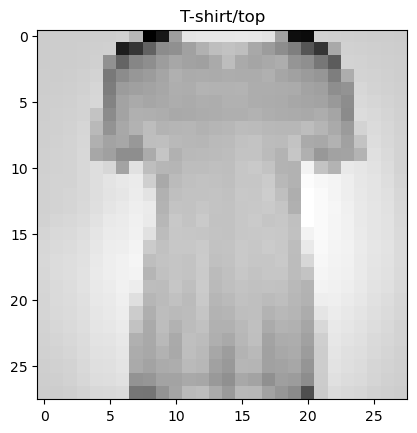

In [17]:
1 # On créer les classes associé à chaque cible
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", 
                 "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# afficher une image
plt.imshow(images[10].reshape(28, 28), cmap="binary")
plt.title(targets_names[targets[10]])
plt.show()

In [18]:
print("Premiere ligne de l'image", images[10][0])
print("Cible associé", targets[10])

Premiere ligne de l'image -0.0142697062475628
Cible associé 0


# Création du premier modèle avec tensorflow

### 1. Applatir l'image

### 2. Ajouter des couches

In [19]:
# Première étatpe applatir l'image
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape = [28, 28]))

# Ajouter des couches
model.add(tf.keras.layers.Dense(256, activation = "relu"))
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

1/1 [==============================] - 0s 41ms/step
[[0.0579832  0.00785782 0.06706177 0.1433137  0.46637502 0.00988035
  0.06374027 0.07170323 0.04817602 0.06390859]] [9]


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiler le modèle pour le bon calcule du coût (l'erreur) et déterminer la précision du modèle

In [21]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [22]:
images_test = images[:5]
labels_test = targets[:5]

print(images_test.shape)
print(labels_test)

outputs_test = model.predict(images_test)

print(outputs_test.shape)
print("Output", outputs_test)

filtered_outputs_test = outputs_test[np.arange(5), labels_test]
print("\nFiltered output", filtered_outputs_test)

log_filtered_output = np.log(filtered_outputs_test)
print("\nLog Filtered output", log_filtered_output)

print("Mean", log_filtered_output)
print("Mean", -log_filtered_output)

(5, 784)
[9 0 0 3 0]
1/1 [==============================] - 0s 27ms/step
(5, 10)
Output [[0.05798318 0.00785782 0.06706177 0.14331372 0.46637517 0.00988034
  0.06374022 0.07170321 0.04817601 0.06390861]
 [0.23513807 0.0377775  0.07795244 0.10176389 0.2926263  0.01540319
  0.03079879 0.06596427 0.03024787 0.11232769]
 [0.13451022 0.03394788 0.11660287 0.02934785 0.30070704 0.03380001
  0.06986568 0.06814963 0.05972715 0.15334164]
 [0.11025317 0.04883733 0.16365549 0.0388363  0.17786771 0.05258192
  0.1271081  0.08155841 0.05382895 0.14547265]
 [0.17748308 0.06298094 0.07410315 0.04369378 0.04224236 0.08451898
  0.05348508 0.20446025 0.04029169 0.21674073]]

Filtered output [0.06390861 0.23513807 0.13451022 0.0388363  0.17748308]

Log Filtered output [-2.7503011 -1.4475824 -2.0061152 -3.2483997 -1.72888  ]
Mean [-2.7503011 -1.4475824 -2.0061152 -3.2483997 -1.72888  ]
Mean [2.7503011 1.4475824 2.0061152 3.2483997 1.72888  ]


### Entrainer le modèle

In [23]:
history = model.fit(images_train, targets_train, epochs = 20, validation_split=0.2)

Epoch 1/20
200/200 [==============================] - 0s 884us/step - loss: 0.8998 - accuracy: 0.7009 - val_loss: 0.6443 - val_accuracy: 0.7669
Epoch 2/20
200/200 [==============================] - 0s 687us/step - loss: 0.5493 - accuracy: 0.8077 - val_loss: 0.5539 - val_accuracy: 0.7919
Epoch 3/20
200/200 [==============================] - 0s 702us/step - loss: 0.4633 - accuracy: 0.8423 - val_loss: 0.5168 - val_accuracy: 0.8069
Epoch 4/20
200/200 [==============================] - 0s 739us/step - loss: 0.4129 - accuracy: 0.8581 - val_loss: 0.4952 - val_accuracy: 0.8175
Epoch 5/20
200/200 [==============================] - 0s 736us/step - loss: 0.3767 - accuracy: 0.8712 - val_loss: 0.4698 - val_accuracy: 0.8288
Epoch 6/20
200/200 [==============================] - 0s 743us/step - loss: 0.3485 - accuracy: 0.8800 - val_loss: 0.4680 - val_accuracy: 0.8319
Epoch 7/20
200/200 [==============================] - 0s 730us/step - loss: 0.3247 - accuracy: 0.8888 - val_loss: 0.4644 - val_accuracy:

{'loss': [0.8998479247093201, 0.5493272542953491, 0.46328774094581604, 0.412942111492157, 0.3766985833644867, 0.34846386313438416, 0.32468512654304504, 0.30245211720466614, 0.284278005361557, 0.2683628499507904, 0.2514556050300598, 0.2375914454460144, 0.22576004266738892, 0.21311382949352264, 0.20084618031978607, 0.19097647070884705, 0.17921100556850433, 0.1717260777950287, 0.16225680708885193, 0.1517484337091446], 'accuracy': [0.7009375095367432, 0.8076562285423279, 0.8423437476158142, 0.8581249713897705, 0.8712499737739563, 0.8799999952316284, 0.8887500166893005, 0.8981249928474426, 0.9065625071525574, 0.9126562476158142, 0.9175000190734863, 0.9231250286102295, 0.9285937547683716, 0.9346874952316284, 0.9389062523841858, 0.9409375190734863, 0.9482812285423279, 0.9496874809265137, 0.9554687738418579, 0.9584375023841858], 'val_loss': [0.6443318128585815, 0.5538529753684998, 0.5167625546455383, 0.4951734244823456, 0.46982765197753906, 0.46795350313186646, 0.4643772542476654, 0.4556816816

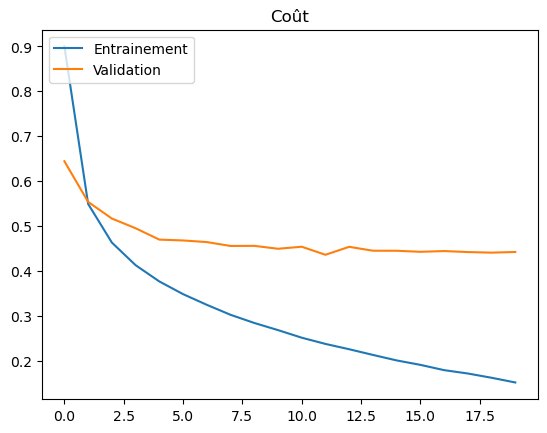

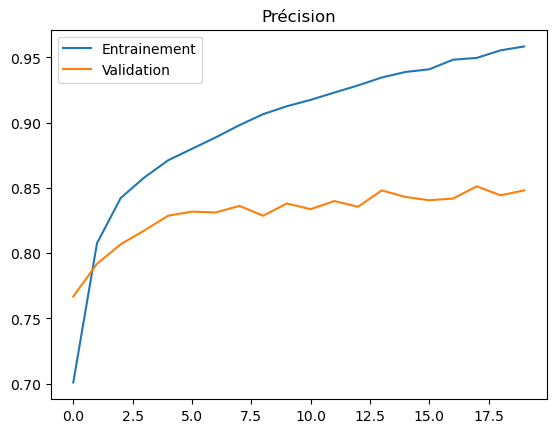

In [24]:
print(history.history)
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Entrainement")
plt.plot(loss_val_curve, label="Validation")
plt.legend(loc='upper left')
plt.title("Coût")
plt.show()

plt.plot(acc_curve, label="Entrainement")
plt.plot(acc_val_curve, label="Validation")
plt.legend(loc='upper left')
plt.title("Précision")
plt.show()

1/1 [==============================] - 0s 90ms/step
[[1.3190330e-06 3.9960632e-08 2.8400073e-06 4.5572456e-06 1.5688311e-05
  5.2204381e-05 1.0787725e-05 2.0630856e-03 2.7960705e-04 9.9756986e-01]]


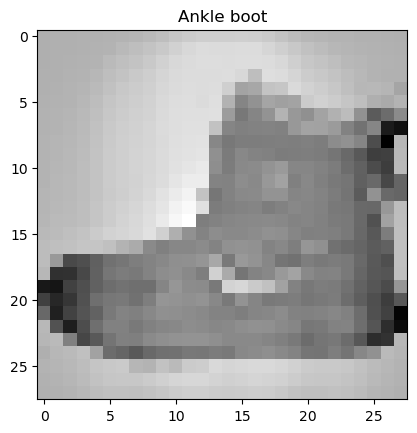

In [39]:
#model.save('simple_neural_network.h5')

loaded_model = tf.keras.models.load_model("simple_neural_network.h5")
print(loaded_model.predict(images_test[0:1]))

plt.imshow(images[0].reshape(28, 28), cmap="binary")
plt.title(targets_names[targets[0]])
plt.show()

In [119]:
import os
import PIL
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import h5py
import numpy as np

In [192]:
data_directory = '/Users/christophemura/Documents/Git/Datasets/training_images'
output_file = 'data.h5'

data = {}

#loaded_images_count = 0

for label in os.listdir(data_directory):
    label_path = os.path.join(data_directory, label)
    if os.path.isdir(label_path):
        for filename in os.listdir(label_path):
            if filename.endswith('.png'):
                image_path = os.path.join(label_path, filename)
                if label not in data:
                    data[label] = []
                data[label].append(image_path)

for label, images in data.items():
    print(f"Classe {label} : {len(images)} images")


Classe 0 : 2001 images
Classe 1 : 2001 images
Classe 4 : 2001 images
Classe 3 : 2001 images
Classe 2 : 2001 images
Classe 5 : 2001 images


In [196]:
with h5py.File(output_file, 'w') as hf:
    for label, images in data.items():
        group = hf.create_group(label)
        for i, image_path in enumerate(images):
            img_data = plt.imread(image_path)
            group.create_dataset(f'Classe {(int)label}', data=img_data)

print("Données enregistrées avec succès dans le fichier HDF5.")

SyntaxError: f-string: invalid syntax. Perhaps you forgot a comma? (2642174409.py, line 6)

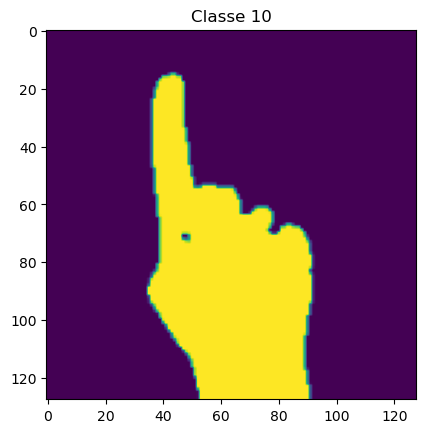

In [195]:
# Chemin vers le fichier HDF5
file_path = 'data.h5'

images = 0
targets = 0

# Ouvrir le fichier HDF5 en mode lecture
with h5py.File(file_path, 'r') as hf:
    # Obtenir les clés des groupes (classes)
    images = list(hf.keys())
    
    # Sélectionner la première classe
    #first_class_name = images[1]
    
    # Obtenir les noms des images dans la première classe
    targets = list(hf[first_class_name].keys())
    
    # Sélectionner le nom de la première image
    #first_image_name = targets[123]
    

# Lire les données de la première image

    image_data = hf[images[1]][targets[2]][()]
    
# Afficher l'image
    plt.imshow(image_data)
    plt.title(f"{targets[2]}")
    plt.show()
    image_data.shape